In [3]:
import sys
sys.path.append("..")

import pandas as pd

from torch.utils.data import DataLoader
from model_zoo import get_model
from dataset_zoo import VG_Relation, VG_Attribution, COCO_Order, Flickr30k_Order

In [4]:
# Please put your data root directory below. We'll download VG-Relation and VG-Attribution images here. 
# Will be a 1GB zip file (a subset of GQA).
root_dir="~/.cache" 


In [5]:
model, preprocess = get_model(model_name="openai-clip:ViT-B/32", device="cuda", root_dir=root_dir)

In [6]:
# Get the VG-R dataset
vgr_dataset = VG_Relation(image_preprocess=preprocess, download=False, root_dir=root_dir)
vgr_loader = DataLoader(vgr_dataset, batch_size=16, shuffle=False)

# Compute the scores for each test case
vgr_scores = model.get_retrieval_scores_batched(vgr_loader)


Computing retrieval scores: 100%|██████████| 1497/1497 [03:25<00:00,  7.29it/s]


In [13]:
#print(vgr_scores)
print(vgr_dataset.dataset[0])
print(len(vgr_dataset.dataset))

{'image_id': '2410049', 'true_caption': 'the door is to the left of the shirt', 'false_caption': 'the shirt is to the left of the door', 'relation_info': {'object': '227262', 'name': 'to the left of'}, 'primary_object_id': '227260', 'primary_object_name': 'door', 'bbox_x': 42, 'bbox_y': 0, 'bbox_w': 259, 'bbox_h': 354, 'relation_name': 'to the left of', 'image_path': '~/.cache/images/2410049.jpg'}
23937


['the shirt is to the left of the door', 'the door is to the left of the shirt']


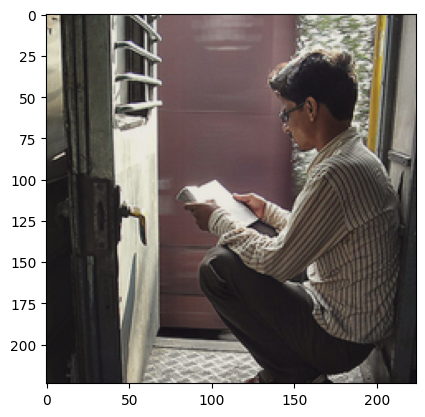

['the man is to the left of the door', 'the door is to the left of the man']


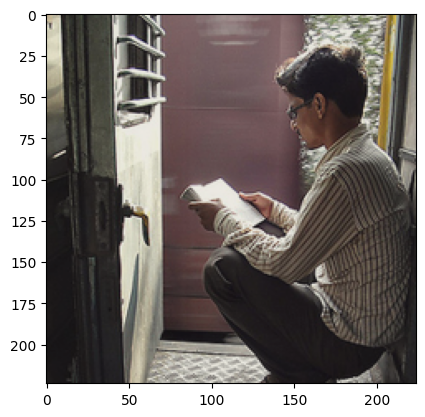

['the shirt is wearing the man', 'the man is wearing the shirt']


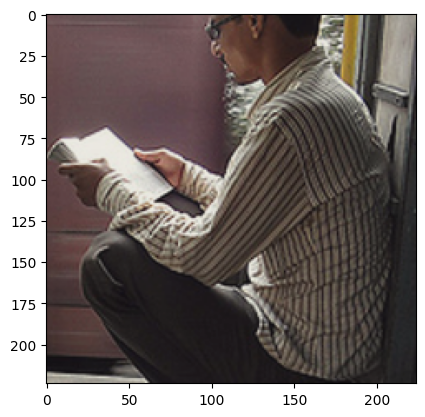

['the train car is on the man', 'the man is on the train car']


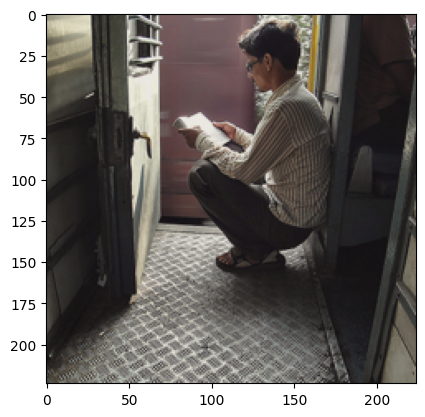

['the door is to the right of the man', 'the man is to the right of the door']


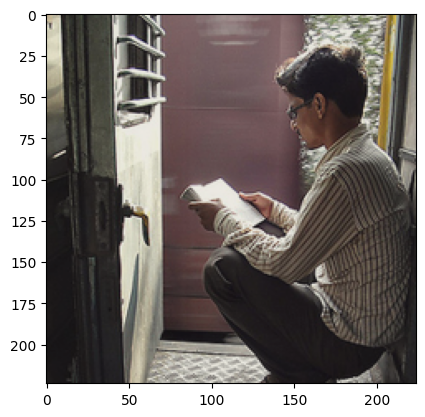

['the train car is in the man', 'the man is in the train car']


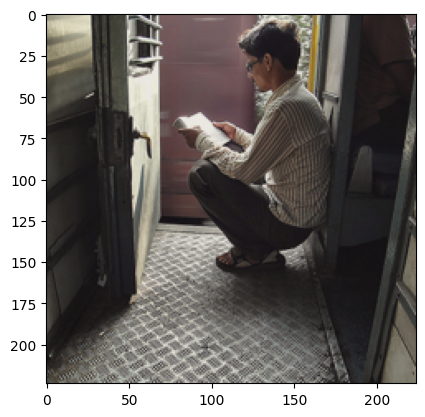

['the door is to the right of the shirt', 'the shirt is to the right of the door']


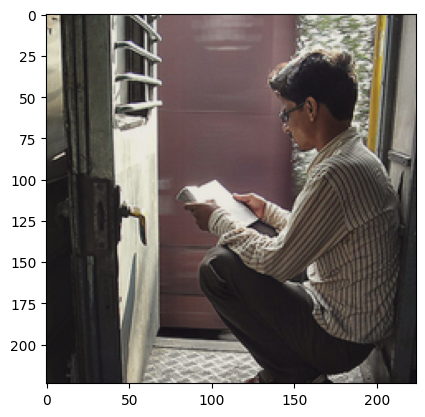

['the plate is on the banana', 'the banana is on the plate']


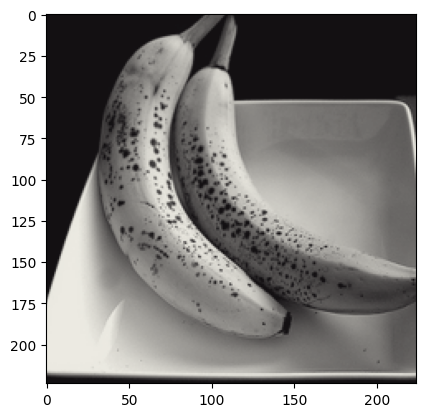

['the plate is under the table', 'the table is under the plate']


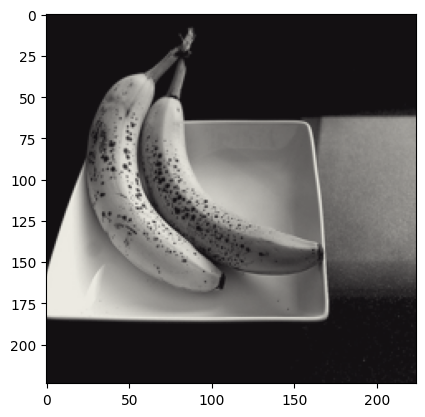

['the plate is below the table', 'the table is below the plate']


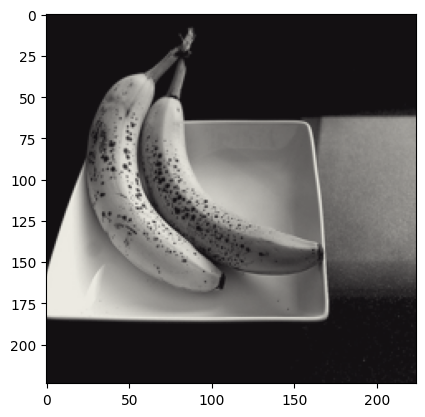

['the plate is on the banana', 'the banana is on the plate']


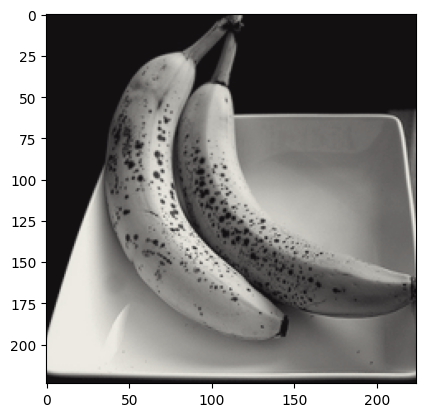

['the table is on the banana', 'the banana is on the table']


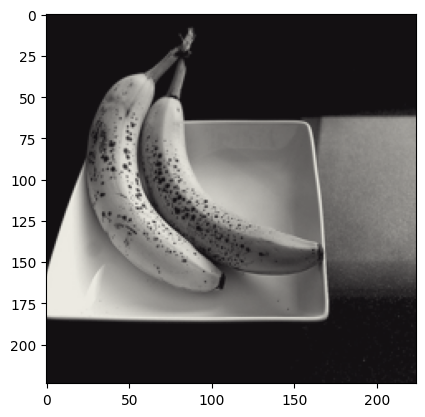

['the banana is with the plate', 'the plate is with the banana']


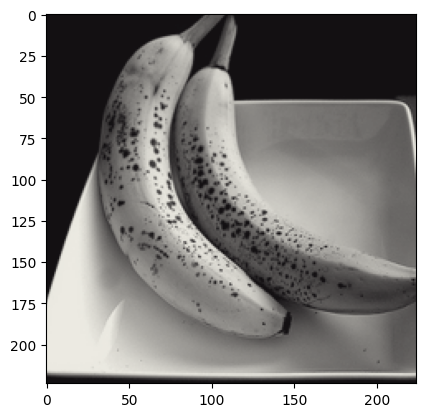

['the table is on top of the plate', 'the plate is on top of the table']


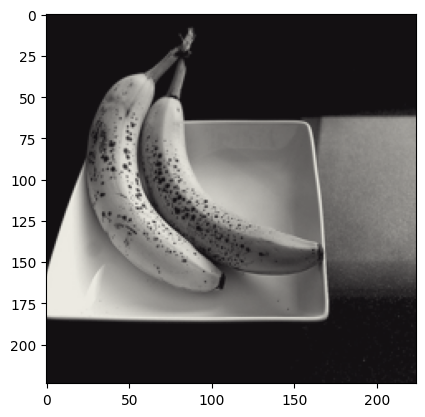

['the table is on the plate', 'the plate is on the table']


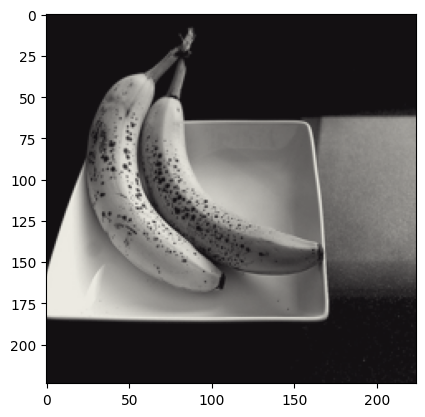

['the table is above the plate', 'the plate is above the table']


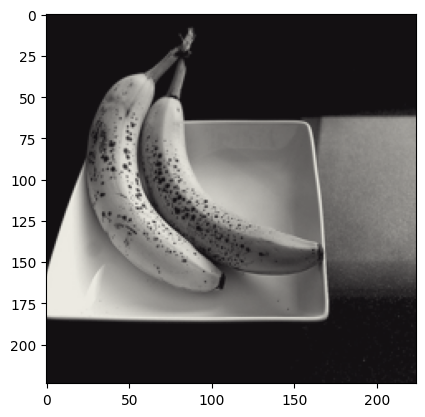

['the banana is with the plate', 'the plate is with the banana']


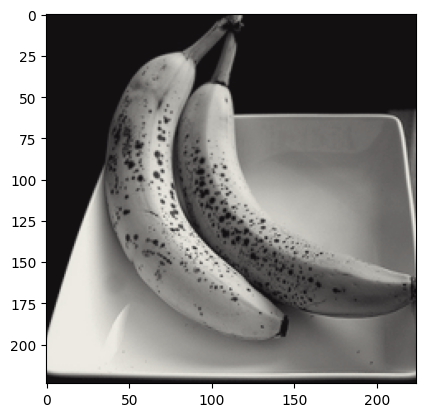

['the woman is to the left of the skier', 'the skier is to the left of the woman']


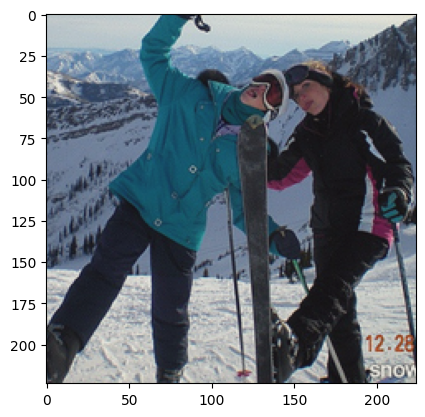

['the boot is wearing the skier', 'the skier is wearing the boot']


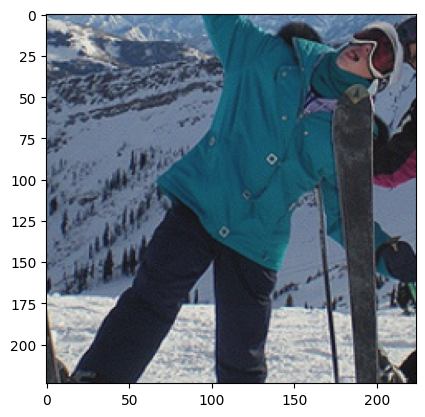

['the skier is to the right of the woman', 'the woman is to the right of the skier']


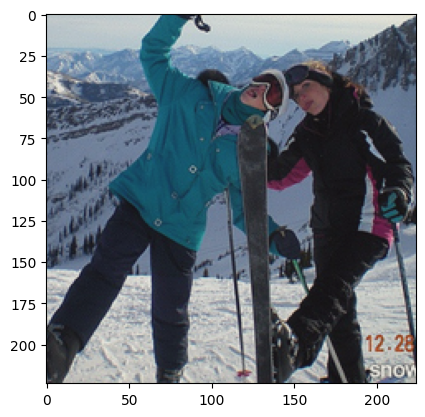

In [8]:
import PIL
import torchvision.transforms as T
import matplotlib.pyplot as plt
#print(vgr_dataset[0])
for idx in range(0, 20):
    vgr_dataset[0]["image_options"][0].shape
    print(vgr_dataset[idx]["caption_options"])
    normalize = T.Normalize(
        mean=[-m / s for m, s in zip([0.485, 0.456, 0.406],
                                    [0.229, 0.224, 0.225])],
        std=[1/s for s in [0.229, 0.224, 0.225]]
    )

    to_pil = T.ToPILImage()
    image = normalize(vgr_dataset[idx]["image_options"][0])
    image = to_pil(image)
    plt.imshow(image)
    plt.show()

In [9]:
# Evaluate the macro accuracy
vgr_records = vgr_dataset.evaluate_scores(vgr_scores)
symmetric = ['adjusting', 'attached to', 'between', 'bigger than', 'biting', 'boarding', 'brushing', 'chewing', 'cleaning', 'climbing', 'close to', 'coming from', 'coming out of', 'contain', 'crossing', 'dragging', 'draped over', 'drinking', 'drinking from', 'driving', 'driving down', 'driving on', 'eating from', 'eating in', 'enclosing', 'exiting', 'facing', 'filled with', 'floating in', 'floating on', 'flying', 'flying above', 'flying in', 'flying over', 'flying through', 'full of', 'going down', 'going into', 'going through', 'grazing in', 'growing in', 'growing on', 'guiding', 'hanging from', 'hanging in', 'hanging off', 'hanging over', 'higher than', 'holding onto', 'hugging', 'in between', 'jumping off', 'jumping on', 'jumping over', 'kept in', 'larger than', 'leading', 'leaning over', 'leaving', 'licking', 'longer than', 'looking in', 'looking into', 'looking out', 'looking over', 'looking through', 'lying next to', 'lying on top of', 'making', 'mixed with', 'mounted on', 'moving', 'on the back of', 'on the edge of', 'on the front of', 'on the other side of', 'opening', 'painted on', 'parked at', 'parked beside', 'parked by', 'parked in', 'parked in front of', 'parked near', 'parked next to', 'perched on', 'petting', 'piled on', 'playing', 'playing in', 'playing on', 'playing with', 'pouring', 'reaching for', 'reading', 'reflected on', 'riding on', 'running in', 'running on', 'running through', 'seen through', 'sitting behind', 'sitting beside', 'sitting by', 'sitting in front of', 'sitting near', 'sitting next to', 'sitting under', 'skiing down', 'skiing on', 'sleeping in', 'sleeping on', 'smiling at', 'sniffing', 'splashing', 'sprinkled on', 'stacked on', 'standing against', 'standing around', 'standing behind', 'standing beside', 'standing in front of', 'standing near', 'standing next to', 'staring at', 'stuck in', 'surrounding', 'swimming in', 'swinging', 'talking to', 'topped with', 'touching', 'traveling down', 'traveling on', 'tying', 'typing on', 'underneath', 'wading in', 'waiting for', 'walking across', 'walking by', 'walking down', 'walking next to', 'walking through', 'working in', 'working on', 'worn on', 'wrapped around', 'wrapped in', 'by', 'of', 'near', 'next to', 'with', 'beside', 'on the side of', 'around']
df = pd.DataFrame(vgr_records)
df = df[~df.Relation.isin(symmetric)]
print(f"VG-Relation Macro Accuracy: {df.Accuracy.mean()}")

VG-Relation Macro Accuracy: 0.5929826793878659


In [10]:
# Get the VG-A dataset
vga_dataset = VG_Attribution(image_preprocess=preprocess, download=True, root_dir=root_dir)
vga_loader = DataLoader(vga_dataset, batch_size=16, shuffle=False)
# Compute the scores for each test case
vga_scores = model.get_retrieval_scores_batched(vga_loader)


Computing retrieval scores:  32%|███▏      | 581/1797 [01:05<02:16,  8.93it/s]


KeyboardInterrupt: 

In [ ]:
# Evaluate the macro accuracy
vga_records = vga_dataset.evaluate_scores(vga_scores)
df = pd.DataFrame(vga_records)
print(f"VG-Attribution Macro Accuracy: {df.Accuracy.mean()}")

VG-Attribution Macro Accuracy: 0.628669424087555


['the wavy bed and the round headboard', 'the round bed and the wavy headboard']


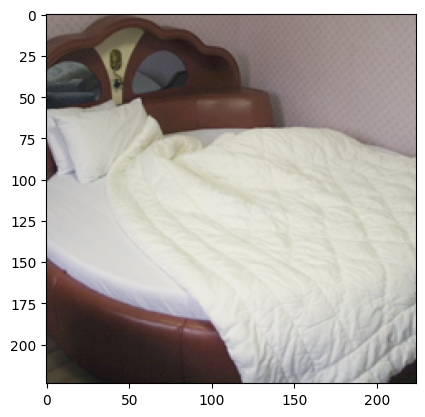

['the young shirt and the brown man', 'the brown shirt and the young man']


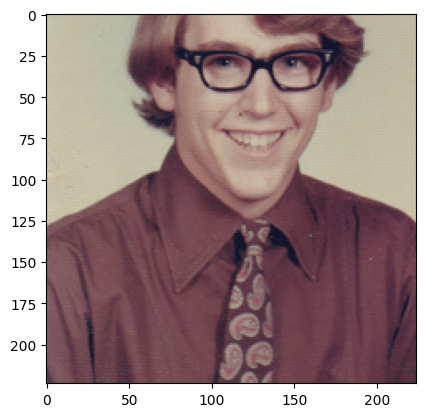

['the concrete tractor and the yellow cow', 'the yellow tractor and the concrete cow']


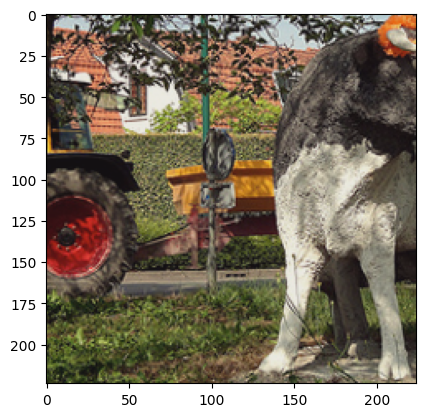

['the open ground and the concrete sky', 'the concrete ground and the open sky']


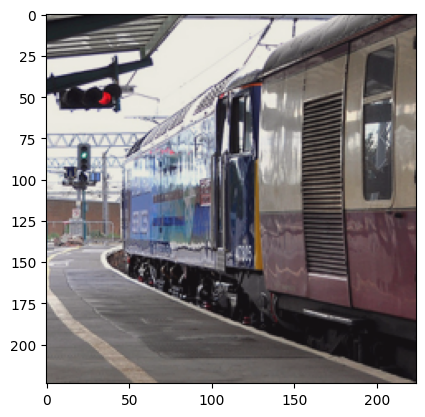

['the stained dog and the tan floor', 'the tan dog and the stained floor']


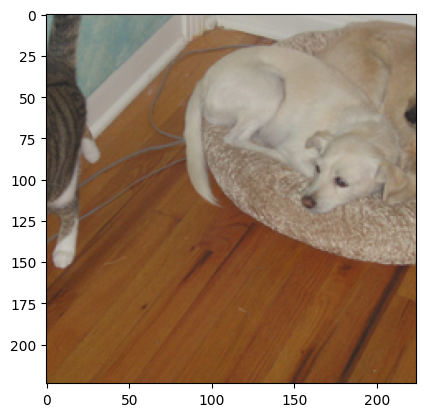

['the reading book and the open people', 'the open book and the reading people']


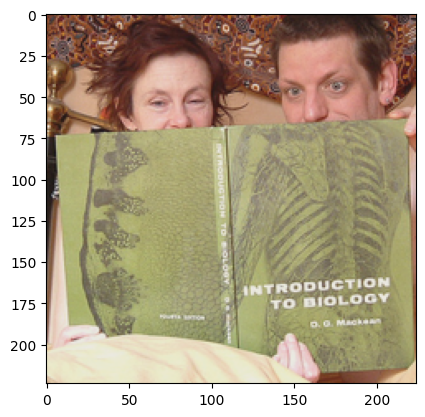

['the metal seat and the up pipe', 'the up seat and the metal pipe']


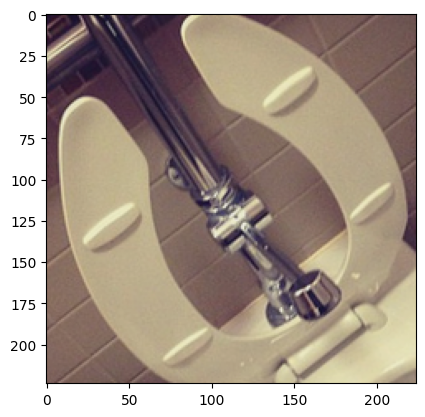

['the brown sheep and the white hay', 'the white sheep and the brown hay']


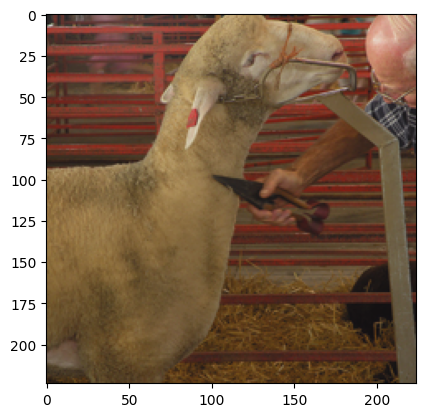

['the painted sky and the cloudy train', 'the cloudy sky and the painted train']


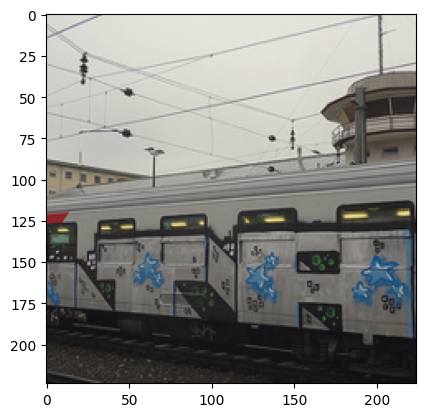

['the large scarf and the striped microwave', 'the striped scarf and the large microwave']


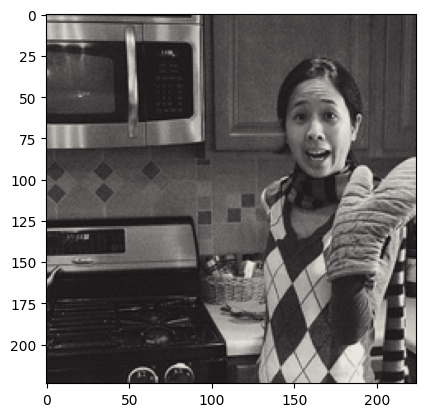

['the splashing surfer and the riding water', 'the riding surfer and the splashing water']


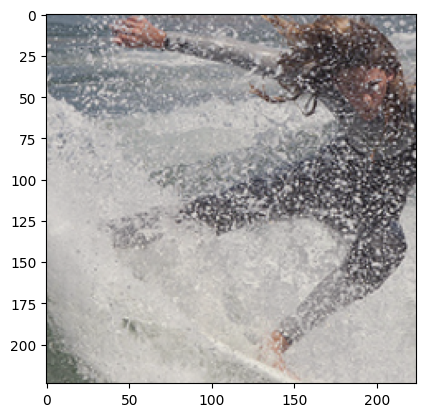

['the yellow table and the clear coffee mug', 'the clear table and the yellow coffee mug']


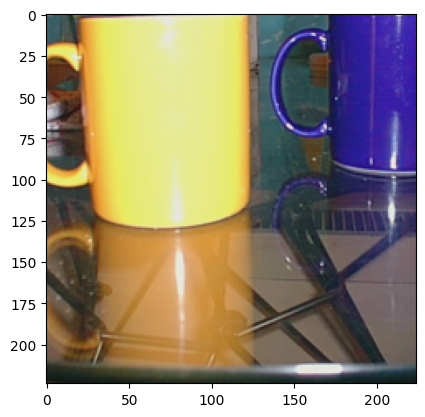

In [ ]:
for idx in range(400, 1000, 50):
    print(vga_dataset[idx]["caption_options"])
    normalize = T.Normalize(
        mean=[-m / s for m, s in zip([0.485, 0.456, 0.406],
                                    [0.229, 0.224, 0.225])],
        std=[1/s for s in [0.229, 0.224, 0.225]]
    )

    to_pil = T.ToPILImage()
    image = normalize(vga_dataset[idx]["image_options"][0])
    image = to_pil(image)
    plt.imshow(image)
    plt.show()

In [ ]:
from dataset_zoo import get_dataset
coco_dataset = get_dataset("COCO_Order", image_preprocess=preprocess, download=True, root_dir="./coco_data")
coco_loader = DataLoader(coco_dataset, batch_size=16, shuffle=False)

0it [00:00, ?it/s]


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/home/loic/nltk_data'
    - '/home/loic/projects/vision-language-models-are-bows/.venv/nltk_data'
    - '/home/loic/projects/vision-language-models-are-bows/.venv/share/nltk_data'
    - '/home/loic/projects/vision-language-models-are-bows/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
